In [ ]:
Tutorial session

In [1]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
# bumps
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1) 
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.1
alpha = 0.0001

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0/sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)


centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.59155441e-01 8.65887748e-01 9.38005000e-01 4.56576050e-01
  9.98586094e-02 9.81346359e-03]
 [1.31993843e-01 5.35261429e-01 9.75309912e-01 7.98516219e-01
  2.93757700e-01 4.85578213e-02]
 [1.28296036e-02 1.20512717e-01 5.08647519e-01 9.64640293e-01
  8.22012235e-01 3.14742637e-01]
 [4.33334765e-04 9.81346359e-03 9.98586094e-02 4.56576050e-01
  9.38005000e-01 8.65887748e-01]]
Score on training data =  0.9999957340594902
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


In [2]:
b= []
for y in centers:
    a = []
    for i in heights:
        a.append(np.exp(1/((-2*sigma**2)*(i-y)**2)))
    b.append(a)
print(b)

[[array([8.75281014e-213]), array([5.84513561e-108]), array([1.41205905e-50]), array([9.1052575e-29])], [array([0.]), array([0.]), array([2.39017969e-103]), array([1.09418685e-47])], [array([0.]), array([0.]), array([6.e-322]), array([5.65022262e-95])], [array([1.06286567e-277]), array([0.]), array([0.]), array([1.06286567e-277])], [array([5.65022262e-95]), array([5.45690209e-178]), array([0.]), array([0.])], [array([1.09418685e-47]), array([1.64356966e-72]), array([1.43339524e-188]), array([0.])]]


PCW session
- I am confused about the training data. Is it supposed to be this way or we should to 'flatten the x axis' in a way the 5th minute of day 1 should have smaller x value of 5th minute of day 2. Otherwise the temperature lines would be heavily overlapped as in the below graphs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)



In [24]:
import pandas as pd
df = pd.read_csv('CRNS0101-05-2011-CA_Yosemite_Village_12_W.txt')
df.columns

Index(['53150 20110101 0005 20101231 1605      2 -119.82   37.76    -6.4     0.0 -99999 0 -9999.0 U 0 -9999 0 -99.000 -9999.0  1218 0 -99.00 0'], dtype='object')

In [26]:
len(data[valid, 1])

630854

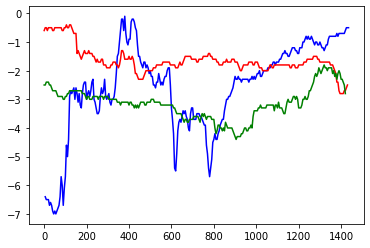

In [32]:
plt.plot(data[valid, 1][:287], data[valid, 2][:287], label='Data', color='b')
plt.plot(data[valid, 1][287:574], data[valid, 2][287:574], label='Data', color='r')
plt.plot(data[valid, 1][575:860], data[valid, 2][575:860], label='Data', color='g')

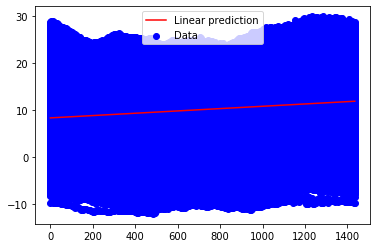

In [4]:
plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [5]:
max(data[valid, 2])

29.9

x.shape (630854, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.25748853e-070 1.94033543e-063 5.19320116e-057 6.24536596e-051
  3.37477679e-045 8.19401262e-040]
 [0.00000000e+000 0.00000000e+000 6.22522714e-322 3.64597401e-307
  9.55851373e-293 1.12598235e-278]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.53999298e-005 5.57390369e-007 3.07487988e-009 7.62186519e-012
  8.48904403e-015 4.24835426e-018]]
Score on training data =  -1.6588342913736742
all_x.shape (2,)
expanded_x.shape (2, 6)
all_y.shape (2,)


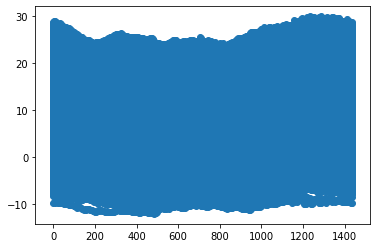

In [6]:
sigma = 0.1
alpha = 0.0001

# New representation:
x_train = data[valid, 1].reshape(-1, 1)
y = data[valid, 2]
x = rbf_kernel(x_train, centers, gamma=1.0/sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, y)
print("Score on training data = ", regr.score(x, y))

x_predict = [[0], [1435]]

# New representation:
expanded_x = rbf_kernel(x_predict, centers, gamma=1 / sigma)
y_predict = regr.predict(expanded_x)
print("all_x.shape", y_predict.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", y_predict.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(x_predict, y_predict)
plt.scatter(x_train, y)

# # Zoom in and see how well predictions fit the data
# zoom_ind = (x_predict > heights.min()) & (x_predict < heights.max())
# plt.figure()
# plt.plot(all_x[zoom_ind], all_y[zoom_ind])
# plt.scatter(heights, weights)